## This notebook will focus on data exploration analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
# import warnings
# warnings.filterwarnings('ignore')
%matplotlib inline
from subprocess import check_output
print(check_output(["ls", "./data"]).decode("utf8"))

auto-mpg.csv



In [26]:
data = pd.read_csv("./data/auto-mpg.csv", index_col="car name", na_values="?")

In [27]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1
ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1
chevy s-10,31.0,4,119.0,82.0,2720,19.4,82,1


In [28]:
print(data.columns)
print(data.index)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')
Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='car name', length=398)


### Check basic data information

In [39]:
print(data.shape)
print(data.dtypes)
print(type(data))

(392, 8)
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object
<class 'pandas.core.frame.DataFrame'>


### Feature columns are of the following types

- mpg: continuous
- cylinders: multi-valued discrete
- displacement: continuous
- horsepower: continuous
- weight: continuous
- acceleration: continuous
- model year: multi-valued discrete
- origin: multi-valued discrete
- car name: discrete

### Check unknown values

In [30]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [31]:
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

In [32]:
data = data.dropna()

In [34]:
data.shape

(392, 8)

In [35]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [40]:
data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

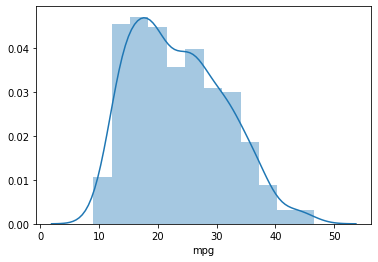

In [41]:
sns.distplot(data.mpg)

In [44]:
print(data.mpg.skew())
print(data.mpg.kurt())

0.45709232306041025
-0.5159934946351457


In [54]:
def box_plot(var):
    data_plt = pd.concat([data['mpg'], data[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="mpg", data=data_plt)
    plt.axhline(data.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

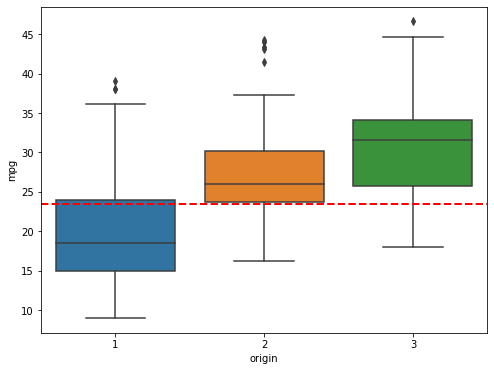

In [55]:
box_plot('origin')

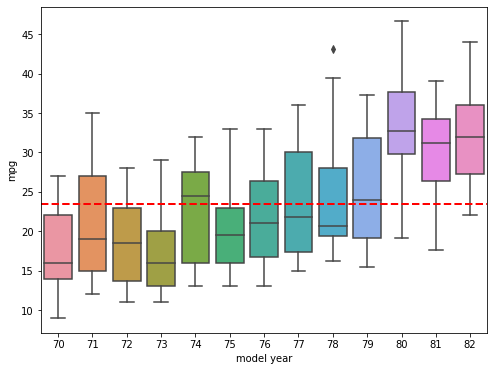

In [57]:
box_plot('model year')

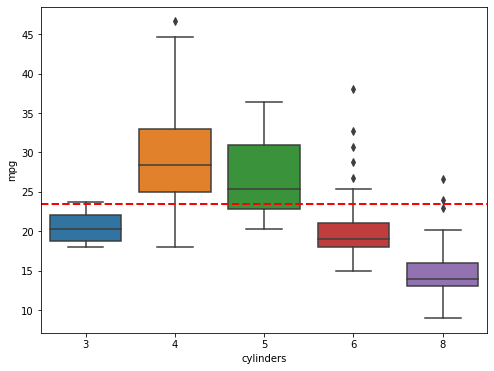

In [58]:
box_plot('cylinders')

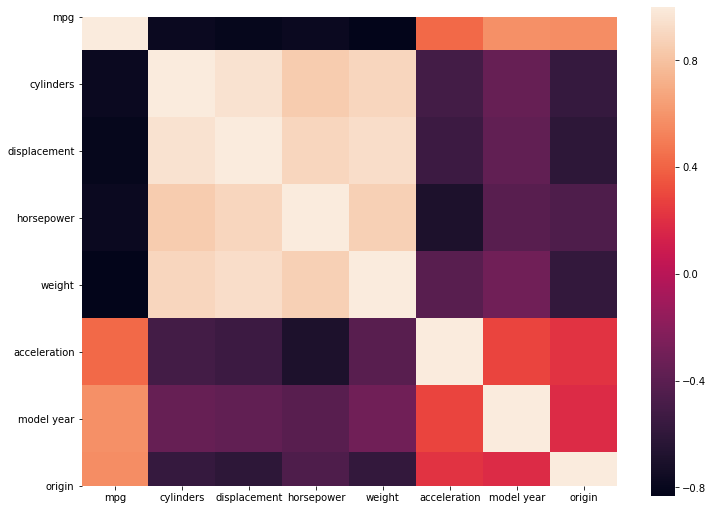

In [59]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True)

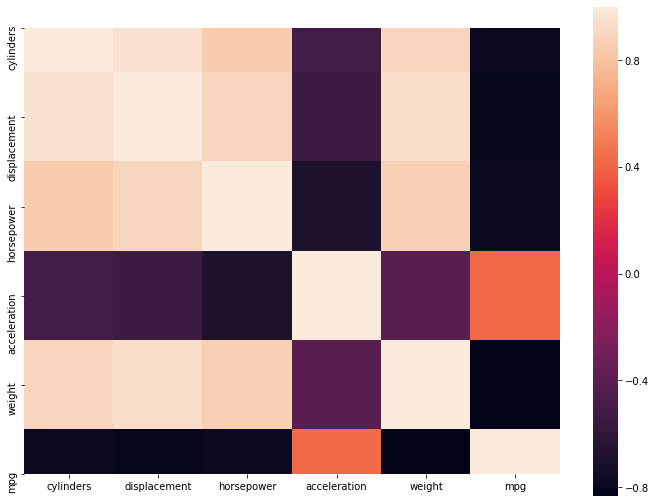

In [60]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','mpg']
corrmat = data[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

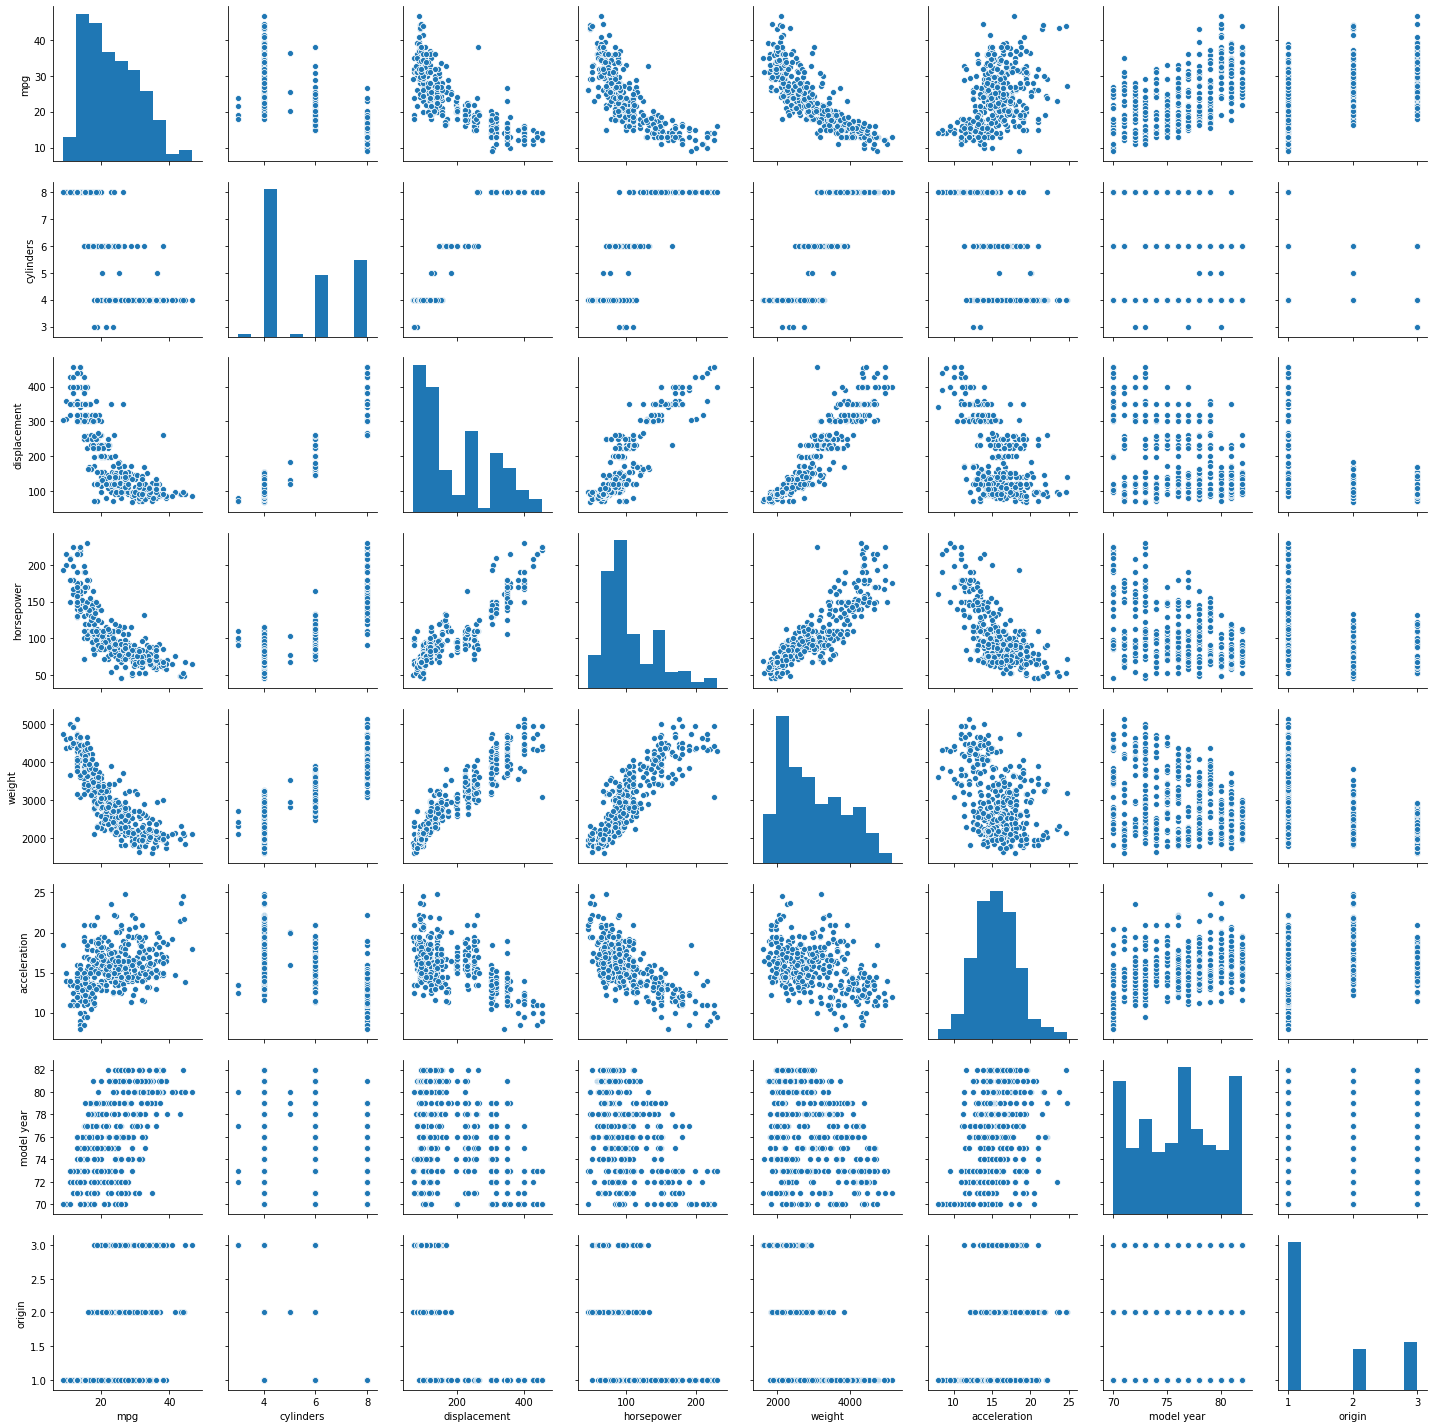

In [62]:
sns.pairplot(data)